### 1- IMPORT LIBRARY



In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid", palette="pastel")

### 2- DATA COLLECTION



In [219]:
!wget https://raw.githubusercontent.com/noobPeople/Alzheimer-disease-classification/refs/heads/main/dataset/alzheimers_disease_data.csv

df = pd.read_csv('/content/alzheimers_disease_data.csv')
df.head()

--2025-11-14 16:16:35--  https://raw.githubusercontent.com/noobPeople/Alzheimer-disease-classification/refs/heads/main/dataset/alzheimers_disease_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 605247 (591K) [text/plain]
Saving to: ‘alzheimers_disease_data.csv.9’

alzheimers_disease_ 100%[===================>] 591.06K  --.-KB/s    in 0.03s   

2025-11-14 16:16:35 (22.3 MB/s) - ‘alzheimers_disease_data.csv.9’ saved [605247/605247]



,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [220]:
df.shape

(2149, 35)

In [221]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [223]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [224]:
numerical_features = df.select_dtypes(include=['float64']).columns
numerical_features = numerical_features.union(['Age', 'SystolicBP', 'DiastolicBP'])

categorical_features = df.select_dtypes(include=['int64']).columns
categorical_features = categorical_features.drop(['Age', 'SystolicBP', 'DiastolicBP'])

### 3- EXPLANATORY DATA ANALYSIS

#### 3.x- Pearson Correllation

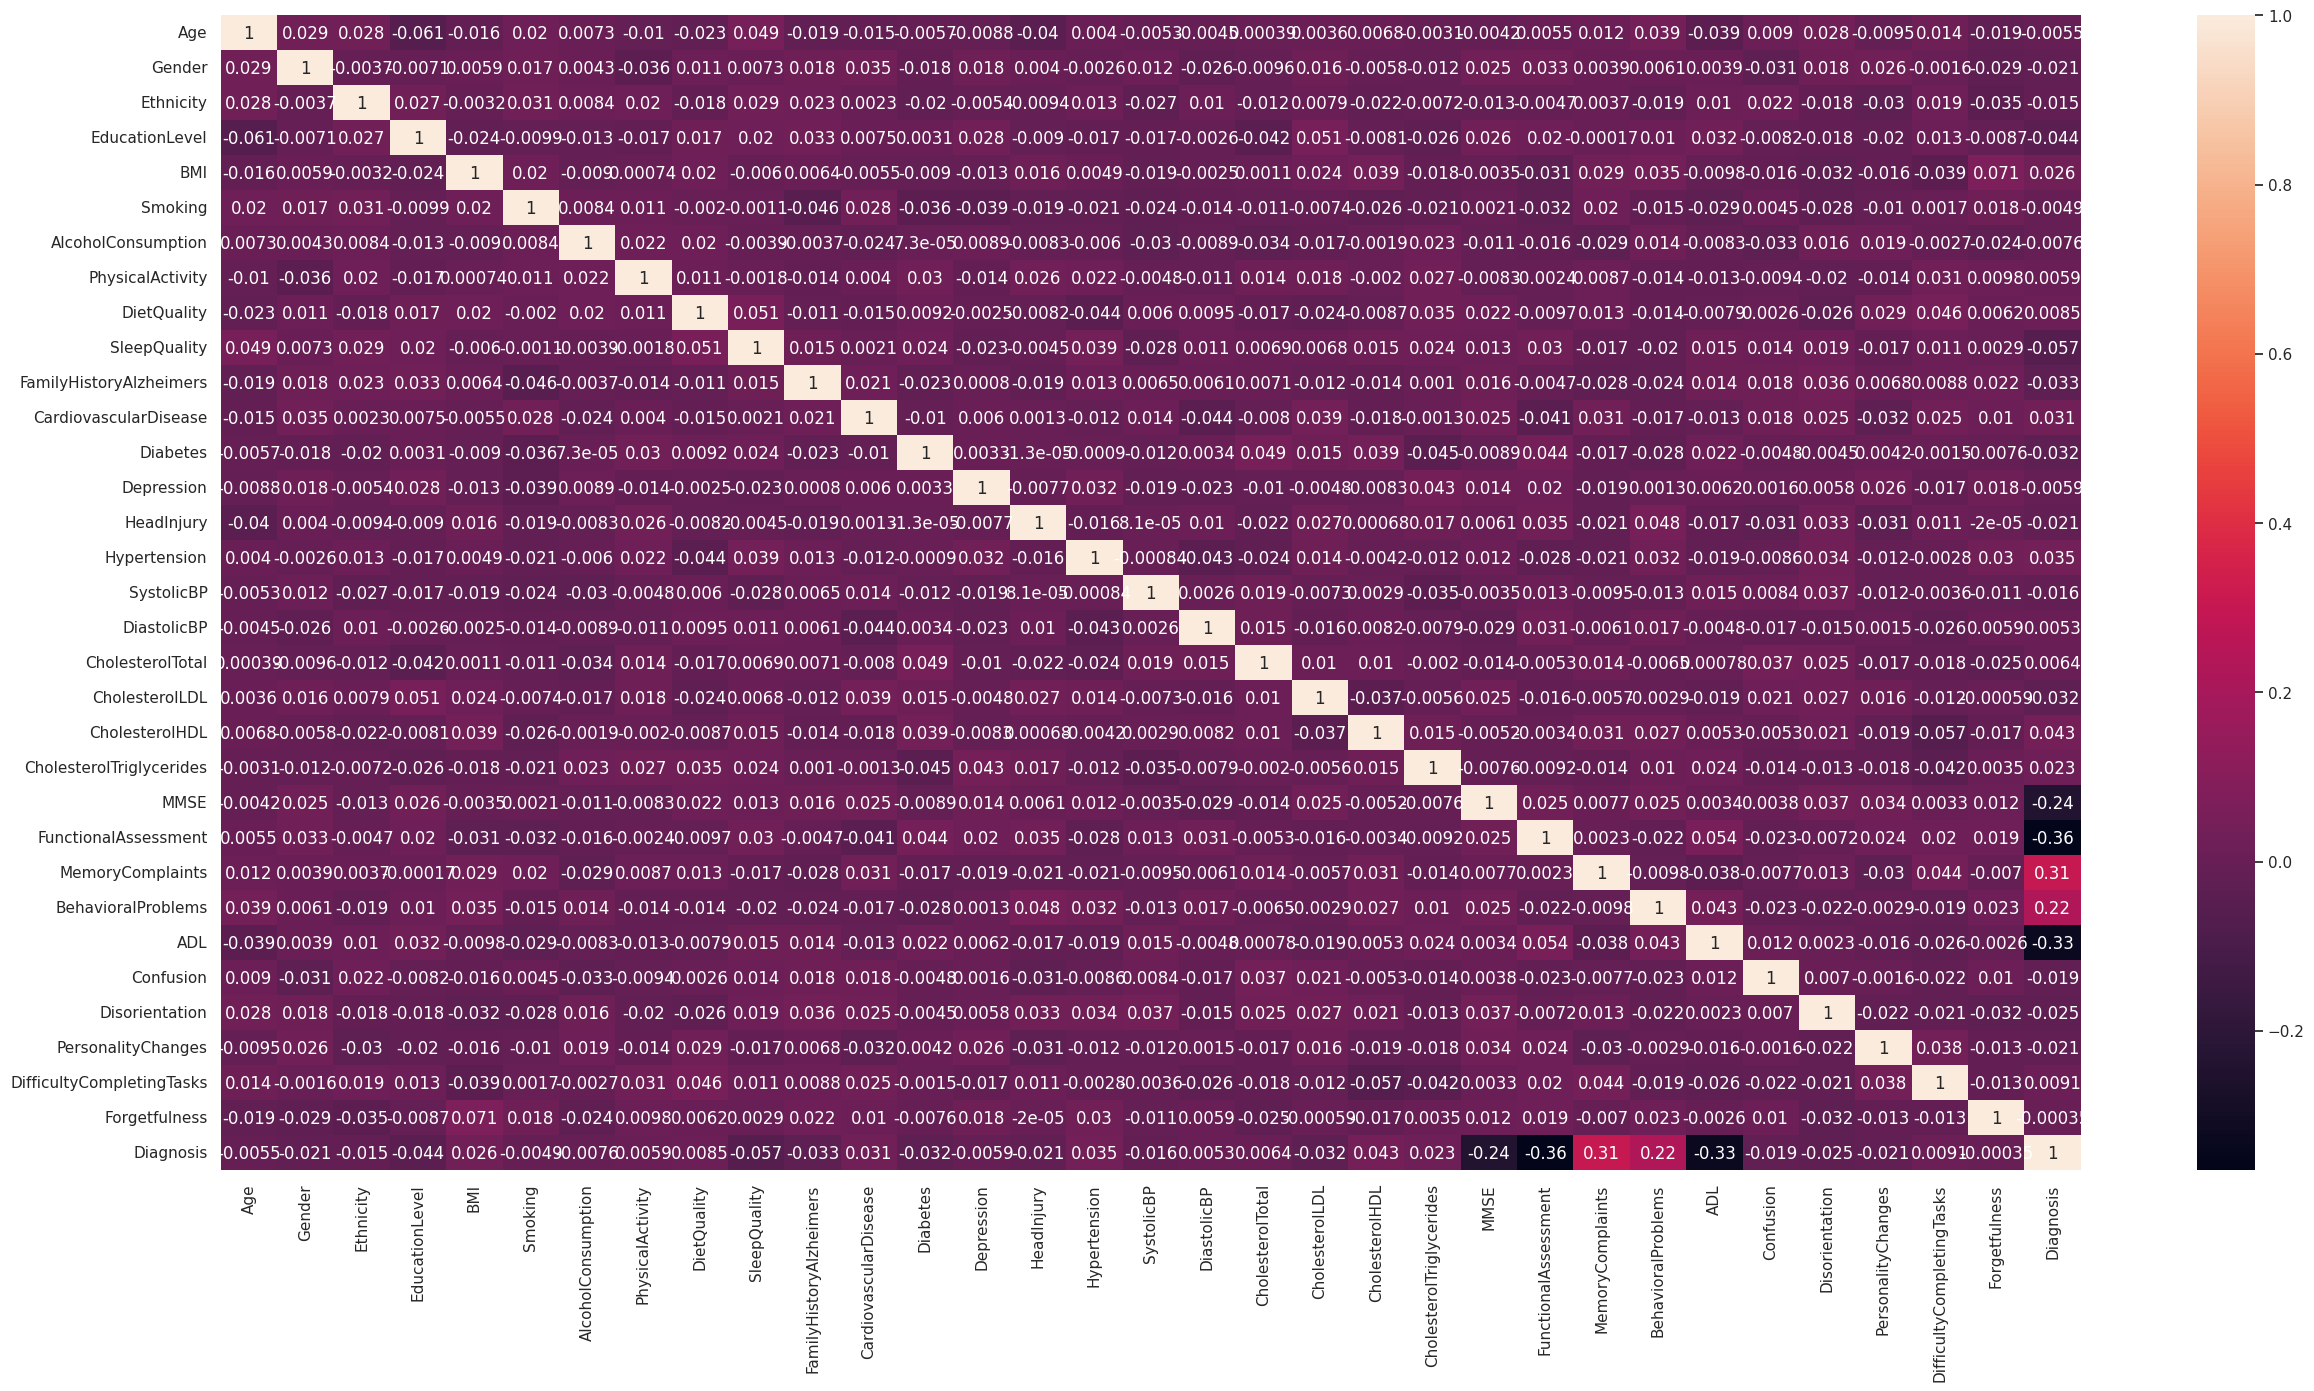

In [225]:
corr = df.drop(columns=['DoctorInCharge', 'PatientID']).corr(method='pearson')
plt.figure(figsize=(30,15))
sns.heatmap(corr,annot=True)
plt.show()

In [226]:
corr_diagnosis = corr['Diagnosis'].sort_values()
corr_diagnosis

,Diagnosis
FunctionalAssessment,-0.364898
ADL,-0.332346
MMSE,-0.237126
SleepQuality,-0.056548
EducationLevel,-0.043966
FamilyHistoryAlzheimers,-0.032900
CholesterolLDL,-0.031976
Diabetes,-0.031508
Disorientation,-0.024648
HeadInjury,-0.021411


### 4- DATA PREPROCESSING

#### 4.1- Checking Duplicated Data

In [227]:
duplicated_data = df['PatientID'].duplicated().sum()
print(f'There are {duplicated_data} duplicated data')

There are 0 duplicated data


#### 4.2- Checking Missing Value

In [228]:
missing_data = df.isnull().sum().sum()
print(f'{missing_data} missing data')

0 missing data


#### 4.3- Remove Irrelevant Data

In [229]:
df.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

#### 4.4- Checking Data Outlier

In [230]:
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if len(outliers) > 0:
        print(f'There are {len(outliers)} outlier in {col}')
    else:
        print(f'There are no outlier in {col}')

There are no outlier in ADL
There are no outlier in Age
There are no outlier in AlcoholConsumption
There are no outlier in BMI
There are no outlier in CholesterolHDL
There are no outlier in CholesterolLDL
There are no outlier in CholesterolTotal
There are no outlier in CholesterolTriglycerides
There are no outlier in DiastolicBP
There are no outlier in DietQuality
There are no outlier in FunctionalAssessment
There are no outlier in MMSE
There are no outlier in PhysicalActivity
There are no outlier in SleepQuality
There are no outlier in SystolicBP


#### 4.5- Checking Multicollinearity

In [231]:
constant = add_constant(df)
vif_data = pd.DataFrame()
vif_data['Feature'] = constant.columns
vif_data['VIF'] = [vif(constant.values, i) for i in range(constant.shape[1])]
vif_data

,Feature,VIF
0,const,239.745898
1,Age,1.018463
2,Gender,1.010805
3,Ethnicity,1.010951
4,EducationLevel,1.018564
5,BMI,1.016520
6,Smoking,1.015220
7,AlcoholConsumption,1.009084
8,PhysicalActivity,1.008961
9,DietQuality,1.014857


In [232]:
low_corr_features = list(corr_diagnosis[
    (corr_diagnosis > -0.01) & (corr_diagnosis < 0.01)
].index)

if 'Diagnosis' in low_corr_features:
    low_corr_features.remove('Diagnosis')

df = df.drop(columns=low_corr_features)

#### 4.6- Splitting Data

In [233]:
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 4.6- Handling Imbalance Data

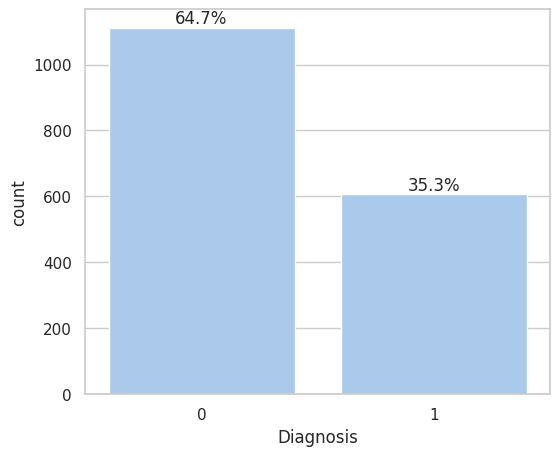

In [234]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(x=y_train)
total = len(y_train)
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.1f}%')

plt.show()

In [235]:
target_value_count = y_train.value_counts()
print("Before Sampling:")
print(target_value_count)

percentage_difference = ((
    abs(target_value_count[0] - target_value_count[1]) /
    (target_value_count[0] + target_value_count[1])
) * 100)
print(f'\nthe target variable is {percentage_difference:.0f}% imbalanced')

Before Sampling:
Diagnosis
0    1112
1     607
Name: count, dtype: int64

the target variable is 29% imbalanced


In [236]:
oversampling = SMOTE()
X_train_sampled, y_train_sampled = oversampling.fit_resample(X_train, y_train)

target_value_count = y_train_sampled.value_counts()
print("After Sampling:")
print(target_value_count)

After Sampling:
Diagnosis
0    1112
1    1112
Name: count, dtype: int64


In [237]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train)

### 5- DATA MODELLING

#### 5.1- Hyperparameter Tuning

Random Forest

In [ ]:
param_grid = {
    'max_features': ['sqrt', 0.5],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search_rf.fit(X_train_sampled, y_train_sampled)
print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best Accuracy score: {grid_search_rf.best_score_:.4f}")

Logistic Regression

In [255]:
param_grid_logistic_regression = [{
        'penalty': ['l1'],
        'C': [0.01, 0.1, 1.0, 10.0],
        'solver': ['liblinear', 'saga']
    },
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1.0, 10.0],
        'solver': ['liblinear', 'lbfgs', 'saga']
    }]

logreg_model = LogisticRegression(random_state=42)

grid_search_logreg = GridSearchCV(
    estimator=logreg_model,
    param_grid=param_grid_logistic_regression,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_logreg.fit(X_train, y_train)
print(f"Best parameters: {grid_search_logreg.best_params_}")
print(f"Best Accuracy score: {grid_search_logreg.best_score_:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy score: 0.8458


Gradient Boosting

In [259]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
    'criterion': ['friedman_mse', 'squared_error']
}

gb_model = GradientBoostingClassifier(random_state=42)

grid_search_gb = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid_gb,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_gb.fit(X_train, y_train)
print(f"Best parameters: {grid_search_gb.best_params_}")
print(f"Best Accuracy score: {grid_search_gb.best_score_:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'criterion': 'squared_error', 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Best Accuracy score: 0.9453


XGBoost

In [260]:
param_grid_xgb = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6],
    'subsample': [0.8, 1.0],
    'reg_lambda': [0, 1]
}

xgb_model = XGBClassifier(random_state=42)

grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search_xgb.fit(X_train, y_train)
print(f"Best parameters: {grid_search_xgb.best_params_}")
print(f"Best Accuracy score: {grid_search_xgb.best_score_:.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'reg_lambda': 1, 'subsample': 0.8}
Best Accuracy score: 0.9500


#### 5.2- Predicting Data Test

In [261]:
y_pred_RandomForest = grid_search_rf.predict(X_test)
y_pred_LogisticRegression = grid_search_logreg.predict(X_test)
y_pred_GradientBoosting = grid_search_gb.predict(X_test)
y_pred_XGBoost = grid_search_xgb.predict(X_test)

### 6- Evaluation

#### 6.1- Classification Results & Confusion Matrix

Random Forest

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       277
           1       0.94      0.87      0.90       153

    accuracy                           0.93       430
   macro avg       0.94      0.92      0.93       430
weighted avg       0.94      0.93      0.93       430


Accuracy : 93.49%



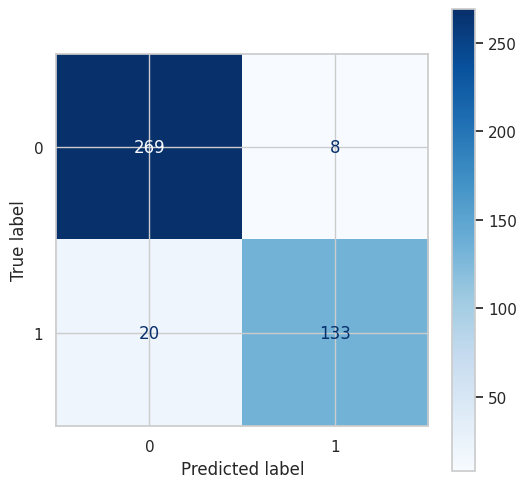

In [265]:
print(classification_report(y_test, y_pred_RandomForest))
print(f'\nAccuracy : {(accuracy_score(y_test, y_pred_RandomForest)*100):.2f}%\n')

fig, ax = plt.subplots(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred_RandomForest, labels=grid_search_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_rf.classes_)
disp.plot(cmap='Blues', ax=ax)
plt.show()

Logistic Regression

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       277
           1       0.79      0.74      0.76       153

    accuracy                           0.84       430
   macro avg       0.83      0.82      0.82       430
weighted avg       0.84      0.84      0.84       430


Accuracy : 83.72%



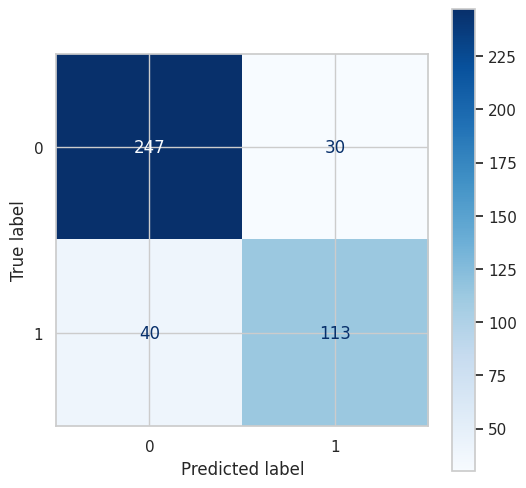

In [266]:
print(classification_report(y_test, y_pred_LogisticRegression))
print(f'\nAccuracy : {(accuracy_score(y_test, y_pred_LogisticRegression)*100):.2f}%\n')

fig, ax = plt.subplots(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred_LogisticRegression, labels=grid_search_logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_logreg.classes_)
disp.plot(cmap='Blues', ax=ax)
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       277
           1       0.96      0.91      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430


Accuracy : 95.35%



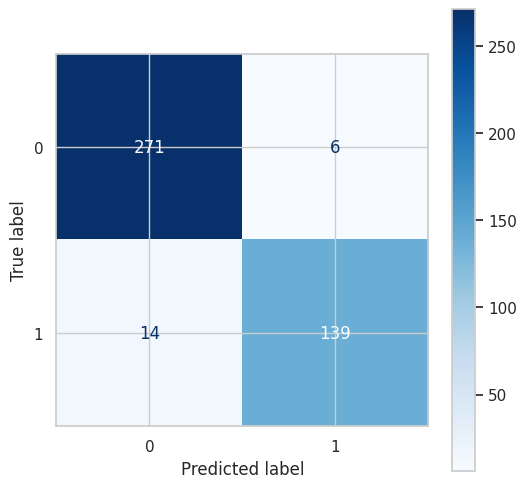

In [267]:
print(classification_report(y_test, y_pred_GradientBoosting))
print(f'\nAccuracy : {(accuracy_score(y_test, y_pred_GradientBoosting)*100):.2f}%\n')

fig, ax = plt.subplots(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred_GradientBoosting, labels=grid_search_gb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_gb.classes_)
disp.plot(cmap='Blues', ax=ax)
plt.show()

XGBoost

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       277
           1       0.96      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430


Accuracy : 95.12%



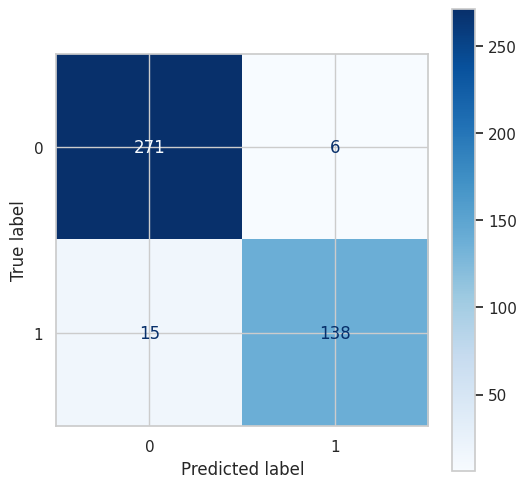

In [268]:
print(classification_report(y_test, y_pred_XGBoost))
print(f'\nAccuracy : {(accuracy_score(y_test, y_pred_XGBoost)*100):.2f}%\n')

fig, ax = plt.subplots(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred_XGBoost, labels=grid_search_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_xgb.classes_)
disp.plot(cmap='Blues', ax=ax)
plt.show()

#### 6.2- ROC & AUC

In [271]:
logreg_proba = grid_search_logreg.predict_proba(X_test)[:, 1]
rf_proba = grid_search_rf.predict_proba(X_test)[:, 1]
gb_proba = grid_search_gb.predict_proba(X_test)[:, 1]
xgb_proba = grid_search_xgb.predict_proba(X_test)[:, 1]

auc_logreg = roc_auc_score(y_test, logreg_proba)
auc_rf = roc_auc_score(y_test, rf_proba)
auc_gb = roc_auc_score(y_test, gb_proba)
auc_xgb = roc_auc_score(y_test, xgb_proba)

print("AUC Logistic Regression: ", auc_logreg)
print("AUC Random Forest: ", auc_rf)
print("AUC Gradient Boosting: ", auc_gb)
print("AUC XGBoost: ", auc_xgb)

AUC Logistic Regression:  0.899459663528468
AUC Random Forest:  0.9398197305396286
AUC Gradient Boosting:  0.9524197163823411
AUC XGBoost:  0.9522663457681508


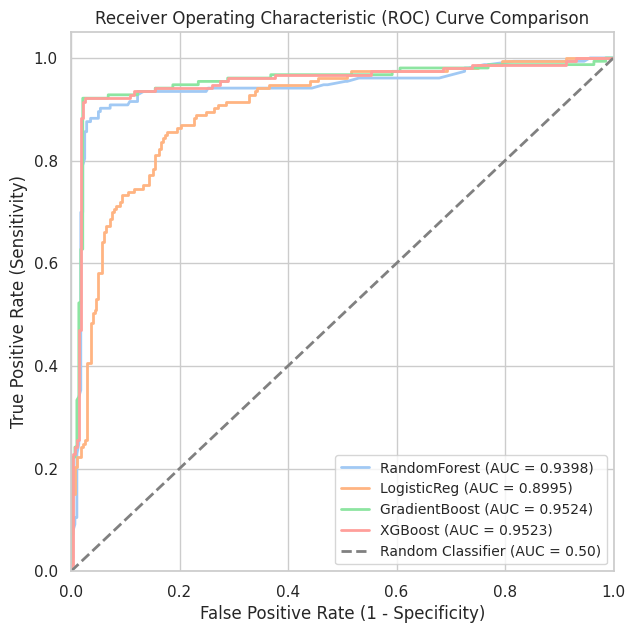

In [278]:
model_probabilities = {
    'RandomForest': rf_proba,
    'LogisticReg': logreg_proba,
    'GradientBoost': gb_proba,
    'XGBoost': xgb_proba
}

model_auc_scores = {
    'RandomForest': auc_rf,
    'LogisticReg': auc_logreg,
    'GradientBoost': auc_gb,
    'XGBoost': auc_xgb
}

plt.figure(figsize=(7,7))

for name, y_proba in model_probabilities.items():
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc_score = model_auc_scores[name]

    plt.plot(fpr, tpr, lw=2,
             label=f'{name} (AUC = {auc_score:.4f})')


plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier (AUC = 0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()